# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import os

In [2]:
driver_path = r'C:\Program Files\Google\Chrome\Application\chromedriver_win32\chromedriver.exe'

browser = Browser('chrome',service=Service(executable_path=driver_path))

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Scrape the website
html = browser.html

# Create a Beautiful Soup object
new_soup = soup(html, 'html.parser')
print(new_soup)

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [28]:
# Extract all rows of data
table = new_soup.find("table", class_="table")
table
#table = new_soup.find_all("tr")
#print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [38]:
# Create an empty list
mars_data = []
mars_head = ['id','terrestrial_date','sol','ls','month','min_temp','pressure']
#rows = table.find_all("tr")

# Loop through the scraped data to create a list of rows
for row in table:
    
    data = table.find_all("td")
    
#    summary_dict = {
 #       "heading": heading,
  #      "data": data
   # }
    
    #mars_list.append(summary_dict)
    mars_data.append(data)
    
    
mars_data


[[<td>2</td>,
  <td>2012-08-16</td>,
  <td>10</td>,
  <td>155</td>,
  <td>6</td>,
  <td>-75.0</td>,
  <td>739.0</td>,
  <td>13</td>,
  <td>2012-08-17</td>,
  <td>11</td>,
  <td>156</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>740.0</td>,
  <td>24</td>,
  <td>2012-08-18</td>,
  <td>12</td>,
  <td>156</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>741.0</td>,
  <td>35</td>,
  <td>2012-08-19</td>,
  <td>13</td>,
  <td>157</td>,
  <td>6</td>,
  <td>-74.0</td>,
  <td>732.0</td>,
  <td>46</td>,
  <td>2012-08-20</td>,
  <td>14</td>,
  <td>157</td>,
  <td>6</td>,
  <td>-74.0</td>,
  <td>740.0</td>,
  <td>57</td>,
  <td>2012-08-21</td>,
  <td>15</td>,
  <td>158</td>,
  <td>6</td>,
  <td>-78.0</td>,
  <td>740.0</td>,
  <td>68</td>,
  <td>2012-08-22</td>,
  <td>16</td>,
  <td>158</td>,
  <td>6</td>,
  <td>-77.0</td>,
  <td>740.0</td>,
  <td>79</td>,
  <td>2012-08-23</td>,
  <td>17</td>,
  <td>159</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>742.0</td>,
  <td>112</td>,
  <td>2012-08-27</td>,
  <td>21</

In [36]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
#df = pd.DataFrame(mars_data, mars_head)
#df

In [ ]:
# Confirm DataFrame was created successfully


In [39]:
# I could not create a dataframe using beautifulsoup so I used pandas to complete the rest of the assignment
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [40]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [42]:
# Change data types for data analysis
mars_df["terrestrial_date"]= pd.to_datetime(mars_df["terrestrial_date"])


In [43]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [46]:
# 1. How many months are there on Mars?
count = mars_df["month"].nunique()
count

12

In [47]:
# 2. How many Martian days' worth of data are there?
days = mars_df["sol"].nunique()
days

1867

In [48]:
# 3. What is the average low temperature by month?
avg_low = mars_df.groupby("month")["min_temp"].mean()
avg_low

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

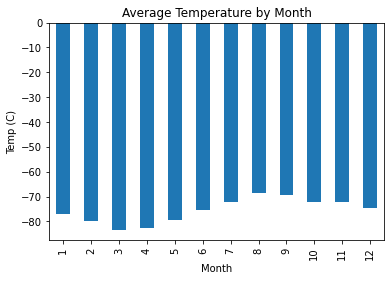

In [57]:
# Plot the average temperature by month
temp = avg_low.plot.bar(title='Average Temperature by Month')
temp.set_xlabel("Month")
temp.set_ylabel("Temp (C)")
temp

In [69]:
# Identify the coldest and hottest months in Curiosity's location
cold = avg_low.min()

hot = avg_low.max()

print(cold)
print(hot)
print(f"The 3rd month is the coldest and the 8th month is the warmest")

-83.30729166666667
-68.38297872340425
The 3rd month is the coldest and the 8th month is the warmest


In [68]:
# 4. Average pressure by Martian month
avg_pr = mars_df.groupby("month")["pressure"].mean()
print(avg_pr)
print(f"The 6th month has the lowest pressure of 745.054 and the 9th month has the highest pressure of 913.306.")

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64
The 6th month has the lowest pressure of 745.054 and the 9th month has the highest pressure of 913.306.


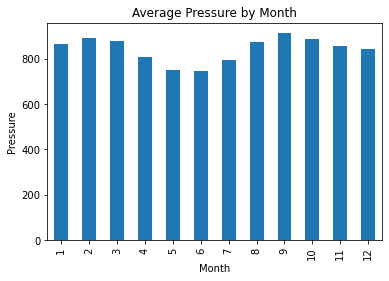

In [58]:
# Plot the average pressure by month
pressure = avg_pr.plot.bar(title='Average Pressure by Month')
pressure.set_xlabel("Month")
pressure.set_ylabel("Pressure")
pressure

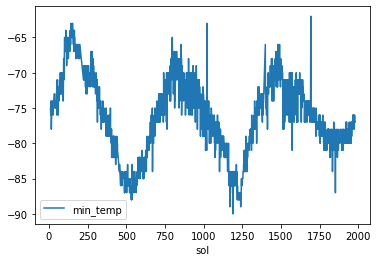

In [66]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mt = mars_df.plot.line("sol", "min_temp")
mt

In [70]:
print(f"The distance from the second peak to the third peak looks to be 800-1450, which is 650 days.")  

The distance from the second peak to the third peak looks to be 800-1450, which is 650 days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [71]:
# Write the data to a CSV
mars_df.to_csv("mars_df.csv", header=True)

In [ ]:
browser.quit()